In [1]:
import os, sys
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


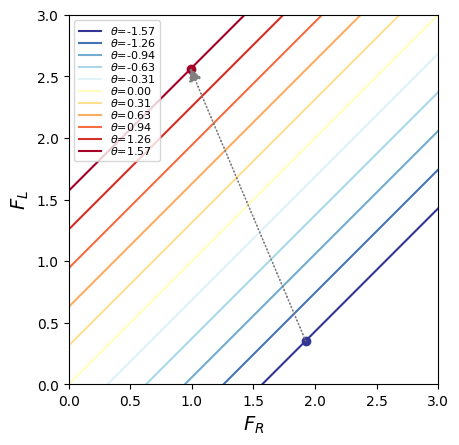

In [34]:
th_min, th_max = -pi/2, pi/2
# th = F_L - F_R
th_vals = linspace(th_min, th_max, 11)
l0 = 0.5
p0 = np.array([pi/2, 0]) + l0*np.array([1,1])/sqrt(2)
l1 = 1.4
p1 = np.array([0, pi/2]) + l1*np.array([1,1])/sqrt(2)

col_fun = lambda th: cm.RdYlBu_r((th-th_min)/(th_max-th_min))
F_R = linspace(0, 3*pi, 10)
for th in th_vals:
    F_L = F_R + th
    plot(F_R, F_L, color=col_fun(th), label=f'$\\theta$={th:.2f}')
plot(p0[0], p0[1], 'o', color=col_fun(th_min))
plot(p1[0], p1[1], 'o', color=col_fun(th_max))
# Plot an arrow from p0 to p1 whose arrowhead is at p1
arrow(p0[0], p0[1], p1[0]-p0[0], p1[1]-p0[1], head_width=0.1, head_length=0.1, fc='gray', ec='gray', length_includes_head=True, zorder=10, linestyle=":")
axis('square')
xlim(0, 3)
ylim(0, 3)
xlabel('$F_R$', fontsize=14)
ylabel('$F_L$', fontsize=14)
legend(labelspacing=0, fontsize=8)